In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer
from transformers import models as tf_models
from dotenv import load_dotenv
load_dotenv()
tqdm.pandas()

from src.feedback_prize_english_language_learning.lib.data_utils.utils import load_datasets, preprocessing_datasets
from src.feedback_prize_english_language_learning.lib.consts import PrizeTypes
from src.feedback_prize_english_language_learning.lib.visualizations.eda import plot_value_counts 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [36]:
ROOT_PATH: Path = Path(os.getenv('ROOT_PATH'))
DATA_PATH: Path = ROOT_PATH / 'data'
MODEL_NAME: str = "microsoft/deberta-v3-base"
prize_types: PrizeTypes = PrizeTypes()

In [8]:
pretrained_tokenizer: tf_models = AutoTokenizer.from_pretrained(MODEL_NAME)
pretrained_model: tf_models = AutoModel.from_pretrained(MODEL_NAME)

/mnt/storage_2/scratch/pl0145-01/jsmok/feedback_prize_english_language_learning/.venv/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [42]:
data: dict[str, pd.DataFrame] = load_datasets(DATA_PATH)
train_df: pd.DataFrame = data['train']
test_df: pd.DataFrame = data['test']

train_df, test_df = preprocessing_datasets(train_df, test_df, pretrained_tokenizer)

In [43]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,token_count,cohesion_scaled,syntax_scaled,vocabulary_scaled,phraseology_scaled,grammar_scaled,conventions_scaled
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,286,0.625,0.625,0.500,0.500,0.750,0.500
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,560,0.375,0.375,0.500,0.250,0.250,0.375
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,372,0.500,0.625,0.500,0.500,0.500,0.375
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,866,0.875,0.875,0.875,0.875,0.750,1.000
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,250,0.375,0.500,0.500,0.500,0.375,0.375


In [44]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,token_count,cohesion_scaled,syntax_scaled,vocabulary_scaled,phraseology_scaled,grammar_scaled,conventions_scaled
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,484.677320,0.531769,0.507063,0.558936,0.529212,0.508214,0.520263
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,214.114468,0.165636,0.161100,0.145787,0.163999,0.174960,0.167863
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,334.000000,0.375000,0.375000,0.500000,0.375000,0.375000,0.375000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,454.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,593.000000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1426.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
test_df.head()

,text_id,full_text,token_count
0,0000C359D63E,when a person has no experience on a job their...,895
1,000BAD50D026,Do you think students would benefit from being...,439
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde...",486


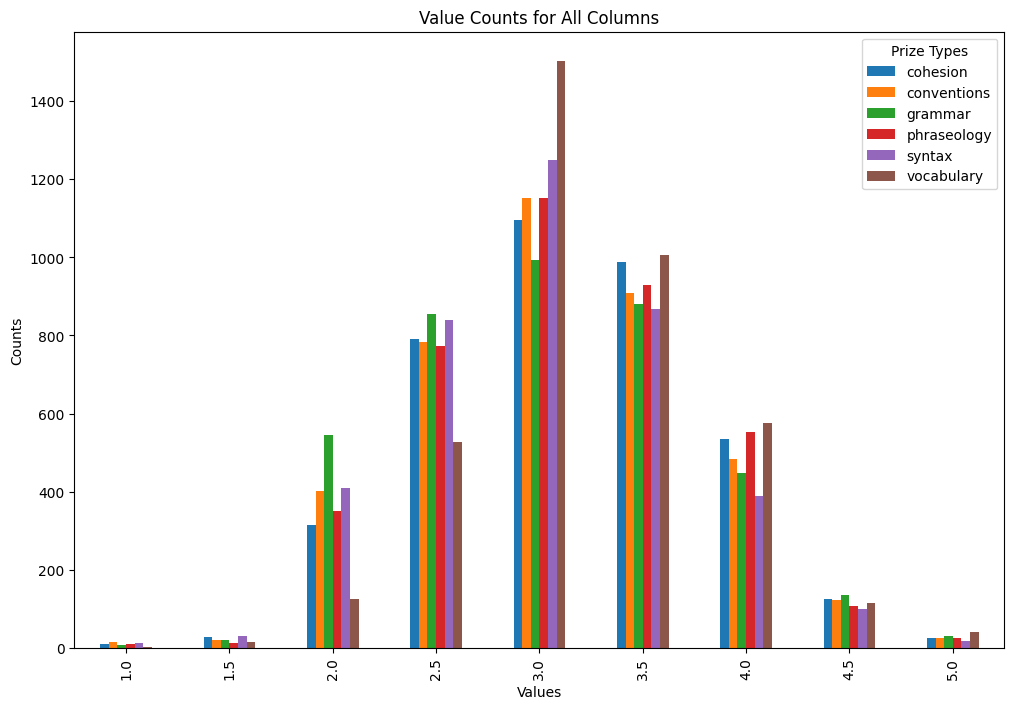

In [53]:
plot_value_counts(train_df)